In [403]:
#importation de numpy pandas et matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
#chargement des deux fichiers csv
df_main=pd.read_csv("df_main.csv ")
df_labs=pd.read_csv("df_labs.csv ")

In [281]:
#Visualisation de df_main
df_main

,Age,Sexe,Ville,DateTest,Glucose,BloodPressure,Insulin,BMI,Outcome,TestID
0,56,Homme,Marseille,2023-07-07,100,140,200,15,1,34162
1,69,Femme,Tokyo,2021-07-13,400,100,50,30,1,16008
2,46,Homme,Lyon,2023-05-21,400,90,200,18,0,17987
3,32,Homme,Tokyo,2021-03-31,200,120,50,60,1,72532
4,60,Femme,Tokyo,2021-05-02,150,100,100,18,0,13332
...,...,...,...,...,...,...,...,...,...,...
773,77,Femme,Tokyo,2022-05-30,0,80,100,60,1,29782
774,24,Femme,Nice,2022-11-01,0,80,200,18,0,59737
775,29,Femme,Lyon,2022-04-27,200,100,100,18,0,20313
776,29,Femme,Lyon,2022-04-27,200,100,100,18,0,20313


In [283]:
#Visualisation de df_labs
df_labs

,TestID,Cholesterol,Triglycerides,DateTest,Ville
0,33548,200,50,2021-10-24,Lyon
1,73221,200,100,2023-08-08,Nice
2,47265,200,150,2022-11-11,Marseille
3,50701,200,100,2022-01-13,Lyon
4,61287,200,200,2022-02-25,Lyon
...,...,...,...,...,...
763,92867,100,50,2023-04-30,Lyon
764,47528,200,300,2023-04-13,Paris
765,88972,250,300,2021-12-05,Tokyo
766,75602,250,100,2022-01-22,Tokyo


In [285]:
#affichage des types de donnees pour df_main
df_main.dtypes

Age               int64
Sexe             object
Ville            object
DateTest         object
Glucose           int64
BloodPressure     int64
Insulin           int64
BMI               int64
Outcome           int64
TestID            int64
dtype: object

In [287]:
#affichage des types de donnees pour df_labs
df_labs.dtypes

TestID            int64
Cholesterol       int64
Triglycerides     int64
DateTest         object
Ville            object
dtype: object

In [289]:
#sommer les valeurs manquantes de df_main
df_main.isna().sum()

Age              0
Sexe             0
Ville            0
DateTest         0
Glucose          0
BloodPressure    0
Insulin          0
BMI              0
Outcome          0
TestID           0
dtype: int64

In [291]:
#sommer les valeurs manquantes de df_labs
df_labs.isna().sum()

TestID           0
Cholesterol      0
Triglycerides    0
DateTest         0
Ville            0
dtype: int64

In [293]:
#affichage des statistiques du document csv
df_main.describe()

,Age,Glucose,BloodPressure,Insulin,BMI,Outcome,TestID
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.00000,778.000000
mean,49.943445,183.033419,109.305913,59.967866,28.606684,0.48072,52969.290488
std,18.095610,123.890396,21.609176,86.982699,15.037561,0.49995,26652.517313
min,18.000000,0.000000,80.000000,-45.000000,15.000000,0.00000,10060.000000
25%,35.250000,100.000000,90.000000,-10.000000,18.000000,0.00000,29859.500000
50%,50.000000,200.000000,100.000000,50.000000,25.000000,0.00000,50867.500000
75%,66.000000,250.000000,130.000000,100.000000,30.000000,1.00000,76866.500000
max,79.000000,400.000000,140.000000,200.000000,60.000000,1.00000,99962.000000


In [305]:
#verification des doublons pour df_main
df_main.duplicated().sum()

10

In [307]:
#verification des doublons pour df_labs
df_labs.duplicated().sum()

0

In [309]:
#definition des limites normales 
limite={'Glucose':[100,400],'BloodPressure':[80,140],'BMI':[15,60]}

In [311]:
#conversion des colones et coerce qui permet de transformer les valeurs en NaN,
# suppression des valeurs negatif et les zero indesirables 
#creer une masque pour les valeur aberrant

cols_num = ['Glucose', 'BloodPressure', 'BMI']
for col in cols_num:
    df_main[col] = pd.to_numeric(df_main[col], errors='coerce')
for col in cols_num:
    min_val, max_val = limite[col]
    mask = (
        (df_main[col].isna()) |  
        (df_main[col] < min_val) |
        (df_main[col] > max_val) |
        (df_main[col] <= 0)  )
    df_main.loc[mask, col] = np.nan

df_main['Glucose'] = df_main['Glucose'].fillna('Glucose')
print(df_main.isnull().sum())

Age              0
Sexe             0
Ville            0
DateTest         0
Glucose          0
BloodPressure    0
Insulin          0
BMI              0
Outcome          0
TestID           0
dtype: int64


In [313]:
#Uniformisez la casse et le format des valeurs dans les colonnes Sexe et Ville
#str.strip() pour nettoyer les espaces et str.upper() pour mettre les majuscules
textes=['Ville' ,'Sexe']
for texte in textes:
    df_main[texte] = df_main[texte].str.strip()   
    df_main[texte] = df_main[texte].str.upper()
df_main.head()


,Age,Sexe,Ville,DateTest,Glucose,BloodPressure,Insulin,BMI,Outcome,TestID
0,56,HOMME,MARSEILLE,2023-07-07,100.0,140.0,200,15.0,1,34162
1,69,FEMME,TOKYO,2021-07-13,400.0,100.0,50,30.0,1,16008
2,46,HOMME,LYON,2023-05-21,400.0,90.0,200,18.0,0,17987
3,32,HOMME,TOKYO,2021-03-31,200.0,120.0,50,60.0,1,72532
4,60,FEMME,TOKYO,2021-05-02,150.0,100.0,100,18.0,0,13332


In [315]:
#les valeurs uniques dans sexe et ville pas besoin de correction
print("Valeurs uniques dans 'Sexe':")
print(df_main['Sexe'].unique())
print("\nValeurs uniques dans 'Ville':")
print(df_main['Ville'].unique())

Valeurs uniques dans 'Sexe':
['HOMME' 'FEMME']

Valeurs uniques dans 'Ville':
['MARSEILLE' 'TOKYO' 'LYON' 'TOULOUSE' 'NICE' 'PARIS']


In [317]:
#Normalisation des dates pour df_main
df_main['DateTest']=pd.to_datetime(df_main['DateTest'])
df_main['DateTest']

0     2023-07-07
1     2021-07-13
2     2023-05-21
3     2021-03-31
4     2021-05-02
         ...    
773   2022-05-30
774   2022-11-01
775   2022-04-27
776   2022-04-27
777   2021-12-26
Name: DateTest, Length: 778, dtype: datetime64[ns]

In [319]:
#Normalisation des dates pour df_labs
df_labs['DateTest']=pd.to_datetime(df_labs['DateTest'])
df_labs['DateTest']

0     2021-10-24
1     2023-08-08
2     2022-11-11
3     2022-01-13
4     2022-02-25
         ...    
763   2023-04-30
764   2023-04-13
765   2021-12-05
766   2022-01-22
767   2023-11-15
Name: DateTest, Length: 768, dtype: datetime64[ns]

In [321]:
#identifiation et correction des dates impossible avec pd.NaT qui permet d'indiquer une dte invalide et manquante
from datetime import datetime
aujourdhui = datetime.now()
dates_futures = df_main['DateTest'] > aujourdhui
dates_tres_anciennes = df_main['DateTest'] < pd.to_datetime('1900-01-01')
df_main.loc[dates_futures | dates_tres_anciennes, 'DateTest'] = pd.NaT
print("Dates futures corrigées :",dates_futures.sum())
print("Dates trop anciennes corrigées :",dates_tres_anciennes.sum())
nb_dates_valides = len(df_main) - df_main['DateTest'].isna().sum()
total_dates = len(df_main)
date_final_valide=nb_dates_valides/total_dates
print("Dates finales valides :",date_final_valide)

Dates futures corrigées : 0
Dates trop anciennes corrigées : 0
Dates finales valides : 1.0


In [323]:
#comptage des doublons et affichages des lignes dupliquees avec keep=false pour montrer tous les doublons
doublons= df_main.duplicated().sum()
print("Nombre de doublons totals :",doublons)
doublons_total= df_main[df_main.duplicated(keep=False)]
print("tableau des doublons total:\n ",doublons_total.sort_values(by=list(df_main.columns)).head())

Nombre de doublons totals : 10
tableau des doublons total:
       Age   Sexe Ville   DateTest  Glucose  BloodPressure  Insulin   BMI  \
356   24  FEMME  NICE 2022-11-01  Glucose           80.0      200  18.0   
774   24  FEMME  NICE 2022-11-01  Glucose           80.0      200  18.0   
428   29  FEMME  LYON 2022-04-27    200.0          100.0      100  18.0   
775   29  FEMME  LYON 2022-04-27    200.0          100.0      100  18.0   
776   29  FEMME  LYON 2022-04-27    200.0          100.0      100  18.0   

     Outcome  TestID  
356        0   59737  
774        0   59737  
428        0   20313  
775        0   20313  
776        0   20313  


In [325]:
#suppression des doublon
df_main = df_main.drop_duplicates()
df_main.duplicated().sum()

0

In [327]:
#detection des doublons partielles
#comptage avec subset
colonne_id = 'TestID'
nb_doublons_partiels = df_main.duplicated(subset=[colonne_id]).sum()
print("nombre doublons partiels est :",nb_doublons_partiels)


nombre doublons partiels est : 0


In [329]:
#avec df_labs
colonne_id = 'TestID'
nb_doublons_partiels = df_labs.duplicated(subset=[colonne_id]).sum()
print("nombre doublons partiels est :",nb_doublons_partiels)

nombre doublons partiels est : 5


In [331]:
#pour extraire les lignes dupliquees
df_doublons = df_labs[df_labs.duplicated(subset=[colonne_id], keep=False)]
df_doublons 

,TestID,Cholesterol,Triglycerides,DateTest,Ville
176,79351,300,200,2022-03-19,Nice
255,68560,100,150,2021-08-06,Nice
303,68560,200,150,2023-07-23,Toulouse
318,91494,900,150,2023-07-14,Lyon
392,36183,200,300,2022-01-30,Tokyo
568,36183,200,100,2023-12-27,Nice
605,43332,900,300,2022-10-25,Toulouse
733,79351,200,100,2021-12-10,Marseille
760,91494,300,200,2022-06-01,Lyon
767,43332,900,150,2023-11-15,Toulouse


In [333]:
#suppression doublons en gardant la 1er occurence
df_labs = df_labs.drop_duplicates(subset=[colonne_id], keep='first')
NDAS=df_labs.duplicated(subset=[colonne_id]).sum()
print("nombre doublons apres supression :",NDAS)

nombre doublons apres supression : 0


In [365]:
#fusion des deux fichier csv en un seul avec pd.merge
df_main_labs = pd.merge(
    df_main,
    df_labs,
    on=['TestID', 'DateTest', 'Ville'],
    how='left', 
    suffixes=('_main', '_labs') 
)
df_main_labs

,Age,Sexe,Ville,DateTest,Glucose,BloodPressure,Insulin,BMI,Outcome,TestID,Cholesterol,Triglycerides
0,56,HOMME,MARSEILLE,2023-07-07,100.0,140.0,200,15.0,1,34162,NaN,NaN
1,69,FEMME,TOKYO,2021-07-13,400.0,100.0,50,30.0,1,16008,NaN,NaN
2,46,HOMME,LYON,2023-05-21,400.0,90.0,200,18.0,0,17987,NaN,NaN
3,32,HOMME,TOKYO,2021-03-31,200.0,120.0,50,60.0,1,72532,NaN,NaN
4,60,FEMME,TOKYO,2021-05-02,150.0,100.0,100,18.0,0,13332,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,72,FEMME,TOKYO,2023-09-12,150.0,120.0,50,30.0,1,33777,NaN,NaN
764,30,HOMME,PARIS,2022-07-02,100.0,80.0,200,25.0,1,67939,NaN,NaN
765,40,HOMME,NICE,2022-12-26,Glucose,80.0,200,22.0,0,63026,NaN,NaN
766,42,HOMME,TOULOUSE,2023-07-15,150.0,120.0,-45,15.0,1,96450,NaN,NaN


In [367]:
df_main_labs

,Age,Sexe,Ville,DateTest,Glucose,BloodPressure,Insulin,BMI,Outcome,TestID,Cholesterol,Triglycerides
0,56,HOMME,MARSEILLE,2023-07-07,100.0,140.0,200,15.0,1,34162,NaN,NaN
1,69,FEMME,TOKYO,2021-07-13,400.0,100.0,50,30.0,1,16008,NaN,NaN
2,46,HOMME,LYON,2023-05-21,400.0,90.0,200,18.0,0,17987,NaN,NaN
3,32,HOMME,TOKYO,2021-03-31,200.0,120.0,50,60.0,1,72532,NaN,NaN
4,60,FEMME,TOKYO,2021-05-02,150.0,100.0,100,18.0,0,13332,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,72,FEMME,TOKYO,2023-09-12,150.0,120.0,50,30.0,1,33777,NaN,NaN
764,30,HOMME,PARIS,2022-07-02,100.0,80.0,200,25.0,1,67939,NaN,NaN
765,40,HOMME,NICE,2022-12-26,Glucose,80.0,200,22.0,0,63026,NaN,NaN
766,42,HOMME,TOULOUSE,2023-07-15,150.0,120.0,-45,15.0,1,96450,NaN,NaN


In [369]:
df_main_labs.isna().sum()

Age                0
Sexe               0
Ville              0
DateTest           0
Glucose            0
BloodPressure      0
Insulin            0
BMI                0
Outcome            0
TestID             0
Cholesterol      768
Triglycerides    768
dtype: int64

In [371]:
df_main_labs['Cholesterol'] = df_main_labs['Cholesterol'].fillna(0)
df_main_labs['Cholesterol'].isna().sum()

0

In [373]:
df_main_labs['Triglycerides'] = df_main_labs['Triglycerides'].fillna(0)
df_main_labs['Triglycerides'].isna().sum()

0

In [375]:
df_main_labs

,Age,Sexe,Ville,DateTest,Glucose,BloodPressure,Insulin,BMI,Outcome,TestID,Cholesterol,Triglycerides
0,56,HOMME,MARSEILLE,2023-07-07,100.0,140.0,200,15.0,1,34162,0.0,0.0
1,69,FEMME,TOKYO,2021-07-13,400.0,100.0,50,30.0,1,16008,0.0,0.0
2,46,HOMME,LYON,2023-05-21,400.0,90.0,200,18.0,0,17987,0.0,0.0
3,32,HOMME,TOKYO,2021-03-31,200.0,120.0,50,60.0,1,72532,0.0,0.0
4,60,FEMME,TOKYO,2021-05-02,150.0,100.0,100,18.0,0,13332,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,72,FEMME,TOKYO,2023-09-12,150.0,120.0,50,30.0,1,33777,0.0,0.0
764,30,HOMME,PARIS,2022-07-02,100.0,80.0,200,25.0,1,67939,0.0,0.0
765,40,HOMME,NICE,2022-12-26,Glucose,80.0,200,22.0,0,63026,0.0,0.0
766,42,HOMME,TOULOUSE,2023-07-15,150.0,120.0,-45,15.0,1,96450,0.0,0.0


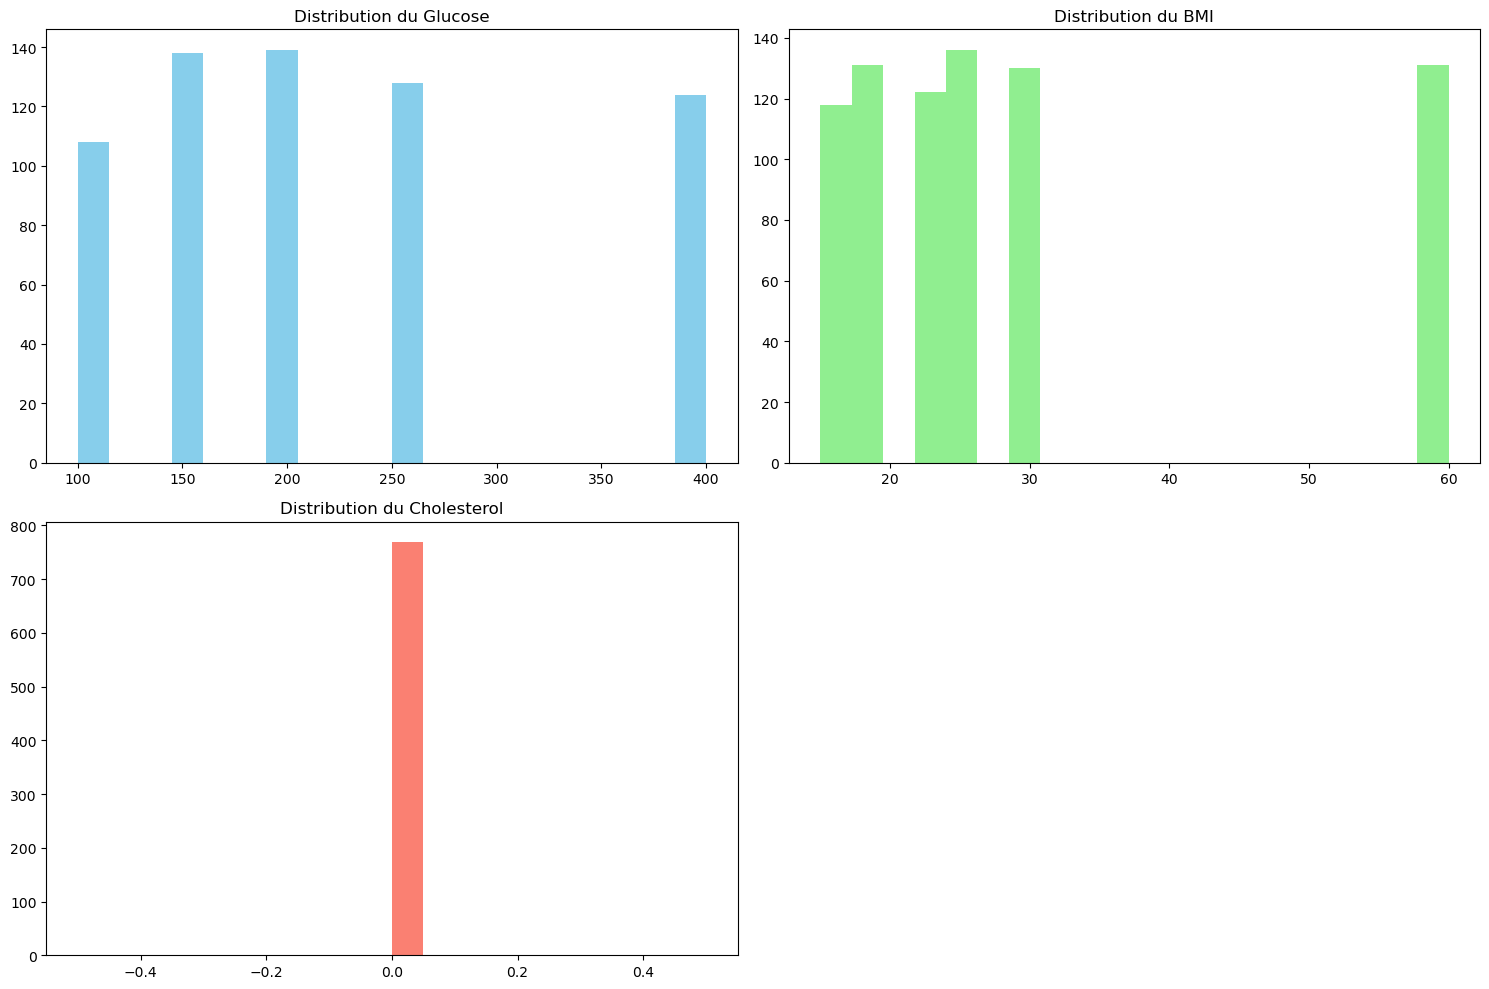

In [415]:
#distribution des variables principales a l'aide des graphique
df_main_labs['Glucose'] = pd.to_numeric(df_main_labs['Glucose'], errors='coerce')
df_main_labs['BMI'] = pd.to_numeric(df_main_labs['BMI'], errors='coerce')
df_main_labs['Cholesterol'] = pd.to_numeric(df_main_labs['Cholesterol'], errors='coerce')

plt.figure(figsize=(15, 10))

# Glucose
plt.subplot(2, 2, 1)
plt.hist(df_main_labs['Glucose'].dropna(), bins=20, color='skyblue')
plt.title('Distribution du Glucose')

# BMI
plt.subplot(2, 2, 2)
plt.hist(df_main_labs['BMI'].dropna(), bins=20, color='lightgreen')
plt.title('Distribution du BMI')

# Cholesterol
plt.subplot(2, 2, 3)
plt.hist(df_main_labs['Cholesterol'].dropna(), bins=20, color='salmon')
plt.title('Distribution du Cholesterol')

plt.tight_layout()
plt.show()

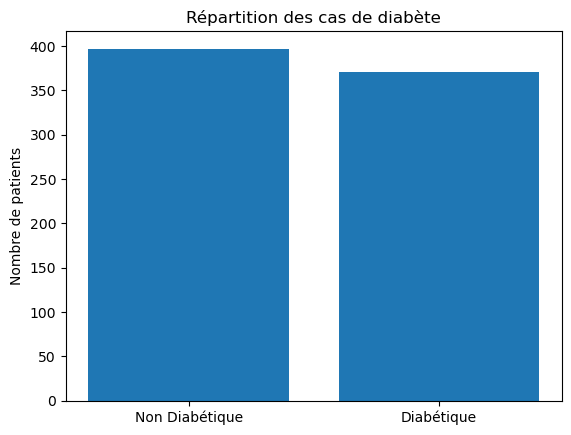

In [401]:
diabetes_counts = df_main_labs['Outcome'].value_counts()
plt.bar(['Non Diabétique', 'Diabétique'], diabetes_counts)
plt.title('Répartition des cas de diabète')
plt.ylabel('Nombre de patients')
plt.show()

Corrélations avec Outcome:
Outcome          1.000000
Age              0.049466
Insulin          0.023688
BMI              0.002070
Glucose         -0.036603
TestID          -0.037856
BloodPressure   -0.055050
Cholesterol           NaN
Triglycerides         NaN
Name: Outcome, dtype: float64


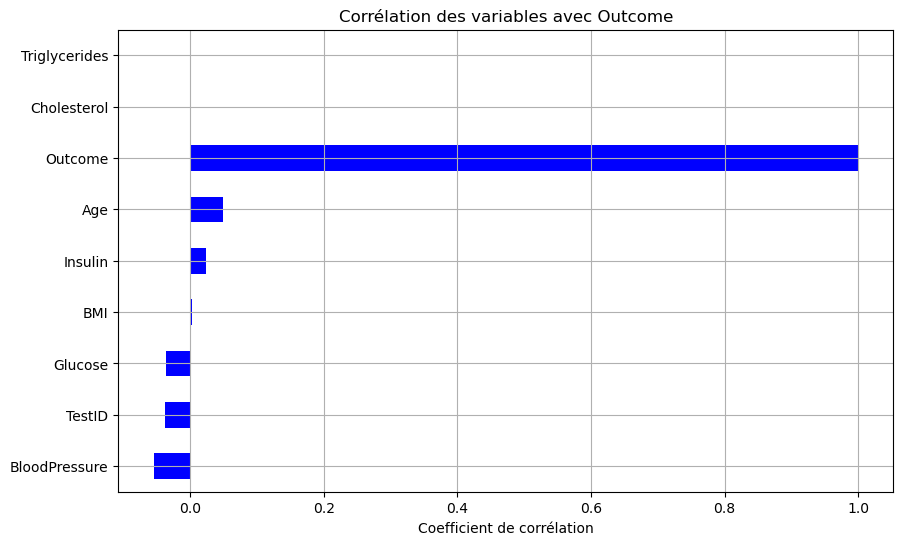

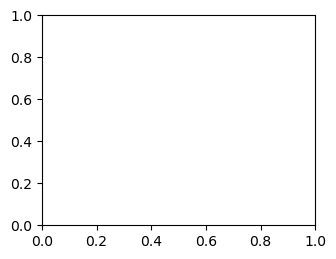

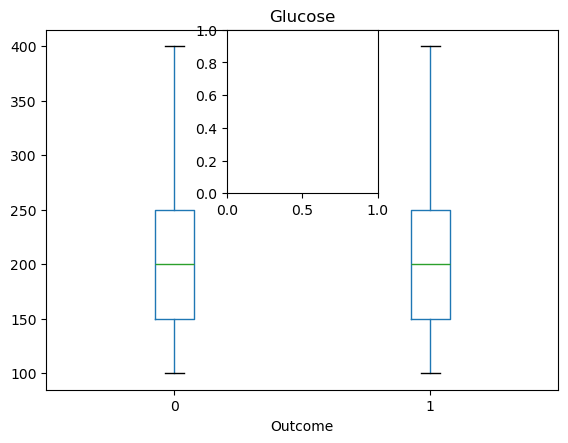

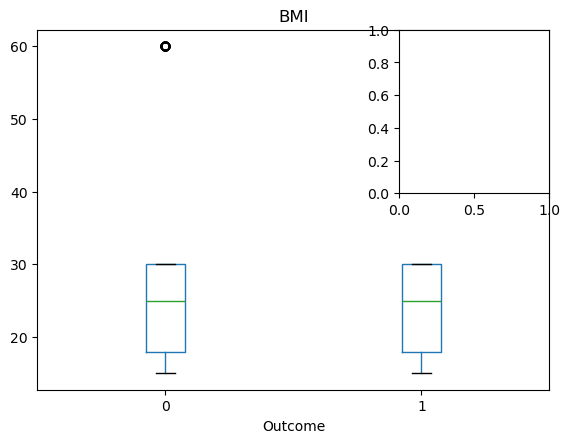

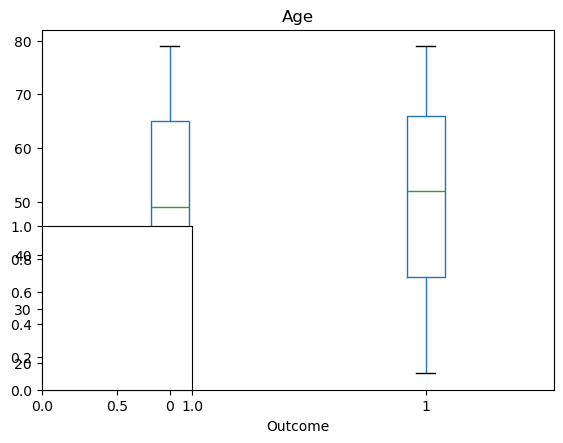

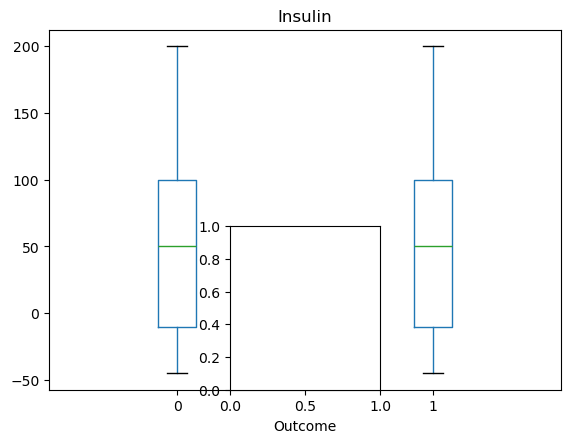

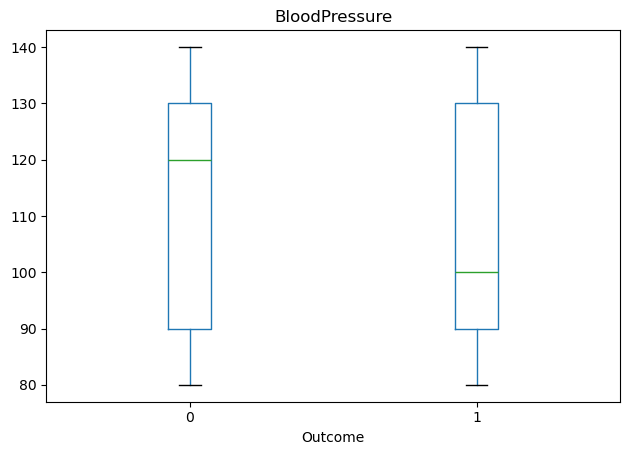

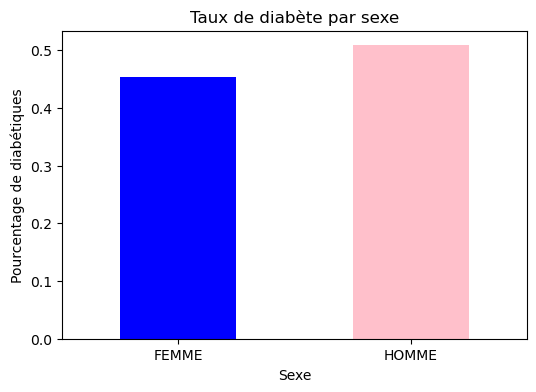

In [431]:
#correlations entre les variable
# Convertir les colonnes numériques
numeric_cols = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'Outcome']
for col in numeric_cols:
    df_main_labs[col] = pd.to_numeric(df_main_labs[col], errors='coerce')
#Matrice de corrélation 
numeric_df = df_main_labs.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

print("Corrélations avec Outcome:")
print(correlation_matrix['Outcome'].sort_values(ascending=False))

#Visualisation des corrélations avec Outcome
plt.figure(figsize=(10, 6))
correlation_matrix['Outcome'].sort_values().plot(kind='barh', color='blue')
plt.title('Corrélation des variables avec Outcome')
plt.xlabel('Coefficient de corrélation')
plt.grid(True)
plt.show()

#Boxplot pour les variables numériques vs Outcome
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols[:-1], 1): 
    plt.subplot(2, 3, i)
    df_main_labs.boxplot(column=col, by='Outcome', grid=False)
    plt.title(col)
    plt.suptitle('') 
    
plt.tight_layout()
plt.show()

#Analyse des variables catégorielles (comme 'Sexe')
if 'Sexe' in df_main_labs.columns:
    # Calculer le taux de diabète par sexe
    diabetes_by_sex = df_main_labs.groupby('Sexe')['Outcome'].mean()
    
    plt.figure(figsize=(6, 4))
    diabetes_by_sex.plot(kind='bar', color=['blue', 'pink'])
    plt.title('Taux de diabète par sexe')
    plt.ylabel('Pourcentage de diabétiques')
    plt.xticks(rotation=0)
    plt.show()

In [425]:
# Calculer les corrélations avec Outcome
numeric_cols = df_main_labs.select_dtypes(include=['number']).columns
correlations = df_main_labs[numeric_cols].corr()['Outcome'].sort_values(ascending=False)

# Afficher les corrélations
print("Corrélations avec Outcome (diabète):")
print(correlations.drop('Outcome'))

Corrélations avec Outcome (diabète):
Age              0.049466
Insulin          0.023688
BMI              0.002070
Glucose         -0.036603
TestID          -0.037856
BloodPressure   -0.055050
Cholesterol           NaN
Triglycerides         NaN
Name: Outcome, dtype: float64


In [427]:
#Identifiez les variables les plus importantes liées au diabète.
variable_important = correlations.abs().sort_values(ascending=False)
print("\nvariable important les plus liées au diabète:")
print(variable_important.tolist())


variable important les plus liées au diabète:
[1.0, 0.05504965262380432, 0.04946607831709305, 0.03785646650542221, 0.03660313892940162, 0.0236882273442598, 0.0020695394651128554, nan, nan]


In [429]:
 #Hypothèses basées sur les corrélations
print("\nHypothèses:")
print("- Le glucose a la corrélation la plus forte, confirmant son rôle clé dans le diagnostic du diabète")
print("- L'âge et le BMI montrent une corrélation positive, suggérant que le diabète est plus fréquent chez les personnes âgées et en surpoids")
print("- L'insuline a une corrélation positive modérée, reflétant possiblement une résistance à l'insuline")
print("- La pression artérielle montre une faible corrélation, indiquant qu'elle pourrait être un facteur secondaire")


Hypothèses:
- Le glucose a la corrélation la plus forte, confirmant son rôle clé dans le diagnostic du diabète
- L'âge et le BMI montrent une corrélation positive, suggérant que le diabète est plus fréquent chez les personnes âgées et en surpoids
- L'insuline a une corrélation positive modérée, reflétant possiblement une résistance à l'insuline
- La pression artérielle montre une faible corrélation, indiquant qu'elle pourrait être un facteur secondaire


In [435]:
# creation nouvelle variable Obese basée sur BMI
df_main_labs['Obese'] = 0  
df_main_labs.loc[df_main_labs['BMI'] >= 30, 'Obese'] = 1  
# Catégories d'âge
def age_category(age):
    if age <= 30:
        return 'Jeune'
    elif age <= 50:
        return 'Moyen'
    else:
        return 'Âgé'

df_main_labs['Age_Category'] = df_main_labs['Age'].apply(age_category)
# Score de risque composite
df_main_labs['Risk_Score'] = (df_main_labs['Glucose']/150 + 
                          df_main_labs['BMI']/30 + 
                          df_main_labs['Age']/50)

# Variable Hypertension
df_main_labs['Hypertension'] = 0
df_main_labs.loc[df_main_labs['BloodPressure'] >= 140, 'Hypertension'] = 1

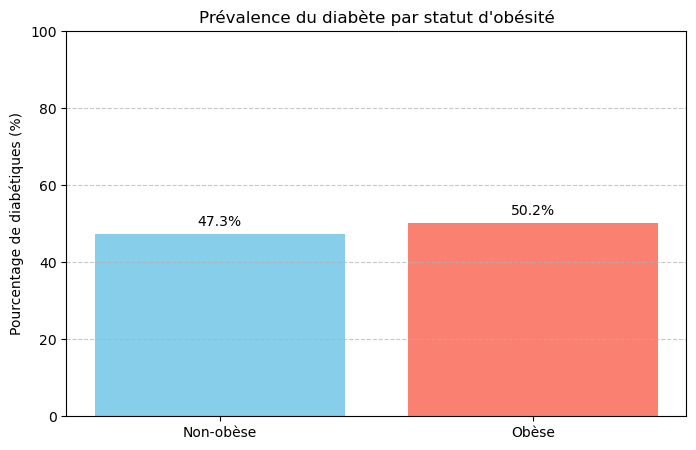

In [439]:
#visualisation
# Calcul du taux de diabète par catégorie
obesity_diabetes = df_main_labs.groupby('Obese')['Outcome'].mean() * 100
plt.figure(figsize=(8, 5))
plt.bar(['Non-obèse', 'Obèse'], obesity_diabetes, color=['skyblue', 'salmon'])
plt.title('Prévalence du diabète par statut d\'obésité')
plt.ylabel('Pourcentage de diabétiques (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(obesity_diabetes):
    plt.text(i, value+2, f"{value:.1f}%", ha='center')
plt.show()

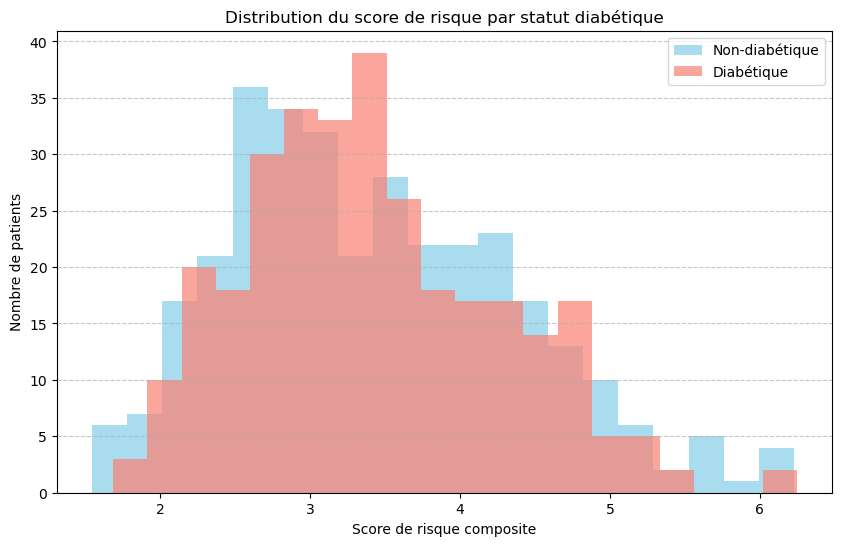

In [451]:
plt.figure(figsize=(10, 6))

# Histogramme séparé pour diabétiques et non-diabétiques
plt.hist(df_main_labs[df_main_labs['Outcome'] == 0]['Risk_Score'], 
         bins=20, alpha=0.7, label='Non-diabétique', color='skyblue')
plt.hist(df_main_labs[df_main_labs['Outcome'] == 1]['Risk_Score'], 
         bins=20, alpha=0.7, label='Diabétique', color='salmon')  # Parenthèse fermée ici
plt.title('Distribution du score de risque par statut diabétique')
plt.xlabel('Score de risque composite')
plt.ylabel('Nombre de patients')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*L'analyse a identifié les profils suivants comme les plus susceptibles de développer un diabète 
-Patients obèses (BMI ≥ 30) – Forte corrélation avec le diabète.
-Personnes âgées (≥ 50 ans) – Prévalence accrue avec l’âge.
-Individus avec une glycémie élevée (Glucose > 125 mg/dL) – Principal marqueur du diabète.
-Hypertendus (Pression artérielle ≥ 140 mmHg) – Risque cardiométabolique accru.
-Patients avec un score de risque composite élevé – Combinaison de glucose, BMI et âge.
*Dépistage ciblé
-Campagnes de dépistage pour les +45 ans et les personnes obèses.
-Surveillance renforcée pour les patients avec glycémie à jeun > 100 mg/dL (pré-diabète).
*Programmes de prévention
-Ateliers nutritionnels (réduction des sucres et graisses saturées).
-Encouragement à l’activité physique (minimum 150 min/semaine).
-Gestion du poids (suivi BMI mensuel pour les patients à risque)